<a href="https://colab.research.google.com/github/GildasTaliah/NatLangPro_py/blob/main/SpokeNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESCRIPTION**
We learn to speak far before we learn to read. Even in the digital age, our main method of communication is speech. Spoken Language Processing with Python will help you load, transform and transcribe audio files. You'll start by seeing what raw audio looks like in Python. And then finish by working through an example business use case, transcribing and classifying phone call data.

# **1.Introduction To Spoken Language Processing with Python**
Audio files are different from most other types of data. Before you can start working with them, they require some preprocessing. In this chapter, you'll learn the first steps to working with speech files by converting two different audio files into soundwaves and comparing them visually.

- Movies show on average **30 pictures per second** which our brain registers as moving imgaes, the sampling rate of an audio file is a measure of data chunks per second used to represent a digital sound, with **1 kHz (digital sounds measure in frequency) equalling 1000 pieces of information per second**.
- For example a typical song usually have **32kHz sampling rate**  This means 32,000 pieces of information per second. Speech and audio books are usually between 8 and 16 kHz.





**The right frequency**

Movies play multiple pictures per second succession to give the illusion of moving pictures, sound is similar but usually at a much larger rate. What's the standard unit of measure for sound frequency?

- That's it! Our audio files have been 48 kHz so far, that's 48,000 cycles per second!

Importing an audio file with Python
You've seen how there are different kinds of audio files and how streaming music and spoken language have different sampling rates. But now we want to start working with these files.

To begin, we're going to import the good_morning.wav audio file using Python's in-built wave library. Then we'll see what it looks like in byte form using the built-in readframes() method.

You can listen to good_morning.wav here [Link](https://assets.datacamp.com/production/repositories/4637/datasets/d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav).

Remember, good_morning.wav is only a few seconds long but at 48 kHz, that means it contains 48,000 pieces of information per second.

In [17]:
# Downlod audio
import requests

url = "https://assets.datacamp.com/production/repositories/4637/datasets/\
d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav"

response = requests.get(url)

with open("good_morning.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [18]:
import wave

# Create audio file wave object
good_morning = wave.open('good_morning.wav', 'r')

# Read all frames from wave object
# The -1 means we want to read in all of the pieces of information within the wave_object.
signal_gm = good_morning.readframes(-1)

# View first 10
print(signal_gm[:10])
print('\n', "Boom! You've just imported your first audio file and seen what it looks like with pure Python. Now let's convert it something more readable." )


b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'

 Boom! You've just imported your first audio file and seen what it looks like with pure Python. Now let's convert it something more readable.


- Our good morning sound wave is a freqquency of 48 kHz and a length of 2 seconds

In [19]:
# Pieces of information
# kHz and length of audio
kHz, length = 48 * 1000, 2
info = kHz * length
print('Pieces of info: ', info)
#print(good_morning.getnframes())

Pieces of info:  96000


**Finding the frame**

 $$\mathbf{Frequency(Hz) = \frac{Lenght Of Wave Object Array}{ Duration Of Audio Files (in second)}}$$

**The right data type**

dtype defaults to float in np.frombuffer(), what's the correct dtype to set it to for visualizing sound wave bytes?

You can try the different options by running np.frombuffer(signal_gm, dtype=____).
- Nice! The 'int16' data type returns positive and negative integers, just as we wanted. Our sound wave integers will be ready to plot in no time!

**Bytes to integers**

You've seen how to import and read an audio file using Python's wave module and the readframes() method. But doing that results in an array of bytes.

To convert the bytes into something more useful, we'll use NumPy's frombuffer() method.

Passing frombuffer() our sound waves bytes and indicating a dtype of 'int16', we can convert our bytes to integers. Integers are much easier to work with than bytes.

The Python wave library has already been imported along with the good_morning.wav audio file.

In [20]:
import numpy as np

# Open good morning sound wave and read frames as bytes
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)

# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values
print(soundwave_gm[:10], '\n')

"Great effort! You've read in an audio file with Python and converted into to integers, that's the first step towards speech recognition!"

[ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11] 



"Great effort! You've read in an audio file with Python and converted into to integers, that's the first step towards speech recognition!"

**Finding the time stamps**

We know the frequency of our sound wave is 48 kHz, but what if we didn't? We could find it by dividing the length of our sound wave array by the duration of our sound wave. However, Python's wave module has a better way. Calling getframerate() on a wave object returns the frame rate of that wave object.

We can then use NumPy's linspace() method to find the time stamp of each integer in our sound wave array. This will help us visualize our sound wave in the future.

The linspace() method takes start, stop and num parameters and returns num evenly spaced values between start and stop.

In our case, start will be zero, stop will be the length of our sound wave array over the frame rate (or the duration of our audio file) and num will be the length of our sound wave array.

In [21]:
# Read in sound wave and convert from bytes to integers
good_morning = wave.open('good_morning.wav', 'r')
signal_gm = good_morning.readframes(-1)
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()
print('Lenght of Wave object: ', len(soundwave_gm) ,'Frame rate: ', framerate_gm)

# Find the sound wave timestamps
time_gm = np.linspace(start=0,
                      stop=len(soundwave_gm)/framerate_gm,
                      num=len(soundwave_gm))

# Print the first 10 timestamps
print("Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred.", '\n')
print(time_gm[:10], '\n')

"Nice! You've done some great data manipulation to our good morning sound wave. Now we'll use all your hard work to plot it and see what it looks like!"

Lenght of Wave object:  249984 Frame rate:  48000
Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred. 

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04] 



"Nice! You've done some great data manipulation to our good morning sound wave. Now we'll use all your hard work to plot it and see what it looks like!"

- **Amplitudde** : The y-axis is the amplitude or how much the sound wave displaces air particles as it moves through the air. A value of 0 indicates no sound at all.

**Staying consistent**

Why is it important to ensure the same data transformations are performed on all of your audio files?
- To ensure data consistency and prevent potential data mismatches.Correct! Performing the same transformations on all of audio files, allows us to work with them in a consistent manner.

**Processing audio data with Python**
You've seen how a sound waves can be turned into numbers but what does all that conversion look like?

And how about another similar sound wave? One slightly different?

In this exercise, we're going to use MatPlotLib to plot the sound wave of good_morning against good_afternoon.

To have the good_morning and good_afternoon sound waves on the same plot and distinguishable from each other, we'll use MatPlotLib's alpha parameter.

You can listen to the good_afternoon audio [here](https://assets.datacamp.com/production/repositories/4637/datasets/16379ca3c3689f5f7cfb3de20585cb6da609294b/good-afternoon.wav) and good_morning audio [here](https://assets.datacamp.com/production/repositories/4637/datasets/d30b8e2319792fb3e9d7ce1e469b15ecf3f75227/good-morning.wav).

In [22]:
# Download good afternoon
url = "https://assets.datacamp.com/production/repositories/4637/datasets/16379ca3c3689f5f7cfb3de20585cb6da609294b/good-afternoon.wav"

response = requests.get(url)

with open("good_afternoon.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [23]:
# Open good afternoon sound wave

good_afternoon = wave.open('good_afternoon.wav', 'r')
signal_ga = good_afternoon.readframes(-1)

# convert good afternoon bytes to integers
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')

# View first 10 sound wave values
print(soundwave_ga[:10], '\n')

# Get the sound wave frame rate
framerate_ga = good_afternoon.getframerate()
print('Lenght of Wave object: ', len(soundwave_ga) ,'Frame rate: ', framerate_ga, '\n')

[-79 -54 -80 -49 -85 -45 -87 -51 -87 -58] 

Lenght of Wave object:  332288 Frame rate:  48000 



In [24]:
## Data Transformation
# Ensure equality in length
soundwave_ga = soundwave_ga[:len(soundwave_gm)]
print('Lenght of Wave object: ', len(soundwave_ga),'Frame rate: ', framerate_ga)
print('Lenght of Wave object: ', len(soundwave_gm) ,'Frame rate: ', framerate_gm)

# Find the sound wave timestamps
time_ga = np.linspace(start=0,
                      stop=len(soundwave_ga)/framerate_ga,
                      num=len(soundwave_ga))
print('Length time ga: ', len(time_ga))
print('Length time gm: ', len(time_gm))
time_gm = time_gm[:len(time_ga)]
print('Length time gm: ', len(time_gm))

# Print the first 10 timestamps
print("Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred.", '\n')
print(time_ga[:10], '\n')

Lenght of Wave object:  249984 Frame rate:  48000
Lenght of Wave object:  249984 Frame rate:  48000
Length time ga:  249984
Length time gm:  249984
Length time gm:  249984
Let's check out the first 10 timestamps. Each of these values is the time in seconds where each sound wave byte occurred. 

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04] 



In [25]:
# Check equity
print('Lenght of Wave object: ', len(soundwave_ga) ,'Frame rate: ', framerate_ga, '\n')
print('Lenght of Wave object: ', len(soundwave_gm) ,'Frame rate: ', framerate_gm, '\n')

# print shapes
print(soundwave_ga.shape, soundwave_gm.shape)

Lenght of Wave object:  249984 Frame rate:  48000 

Lenght of Wave object:  249984 Frame rate:  48000 

(249984,) (249984,)


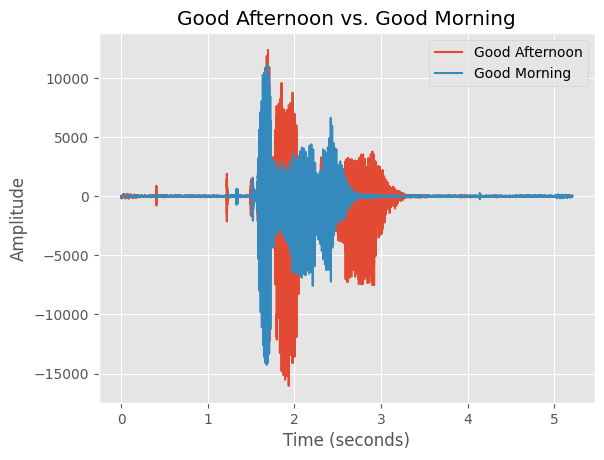

" Great effort! Notice the two sound waves are very similar in the beginning. Because the first word is good in both audio files, they almost completely overlap. A well-built speech recognition system would recognize this and return the same first word for each wave. Let's build one to do just that."

In [26]:
# Setup the title and axis titles
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.title('Good Afternoon vs. Good Morning')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot

plt.plot(time_gm, soundwave_gm, label='Good Morning')#,
   # Set the alpha variable to 0.5
  # alpha=0.5)

plt.legend()
plt.show()

" Great effort! Notice the two sound waves are very similar in the beginning. \
Because the first word is good in both audio files, they almost completely overlap. \
A well-built speech recognition system would recognize this and return the same \
first word for each wave. Let's build one to do just that."

# **2. Using the Python Speech Recognition Library**

Speech recognition is still far from perfect. But the SpeechRecognition library provides an easy way to interact with many speech-to-text APIs. In this section, you'll learn how to use the SpeechRecognition library to easily start converting the spoken language in your audio files to text.

Speech recognition is still far from perfect. But the SpeechRecognition library provides an easy way to interact with many speech-to-text APIs. In this section, you'll learn how to use the SpeechRecognition library to easily start converting the spoken language in your audio files to text.


Which of the following is not a speech recognition API within the speech_recognition library?

An instance of the Recognizer class has been created and saved to recognizer. You can try calling the API on recognizer to see what happens.
 **recognize_google_cloud()** **recognize_google()** **recognize_bing()** **what does this say()**

**Using the SpeechRecognition library**

To save typing speech_recognition every time, we'll import it as sr.

We'll also setup an instance of the Recognizer class to use later.

The energy_threshold is a number between 0 and 4000 for how much the Recognizer class should listen to an audio file.

energy_threshold will dynamically adjust whilst the recognizer class listens to audio.

In [ ]:
#!pip install SpeechRecognition

In [29]:
# Importing the speech_recognition library
import speech_recognition as sr

# Create an instance of the Recognizer class
recognizer = sr.Recognizer()

# Set the energy threshold
recognizer.energy_threshold = 300

"The most important step done! Now you're ready to start accessing the speech_recognition library and use the Recognizer class!"

"The most important step done! Now you're ready to start accessing the speech_recognition library and use the Recognizer class!"

Using the Recognizer class
Now you've created an instance of the Recognizer class we'll use the recognize_google() method on it to access the Google web speech API and turn spoken language into text.

recognize_google() requires an argument audio_data otherwise it will return an error.

US English is the default language. If your audio file isn't in US English, you can change the language with the language argument. A list of language codes can be seen [here](https://cloud.google.com/speech-to-text/docs/speech-to-text-supported-languages).

An audio file containing English speech has been imported as clean_support_call_audio. You can listen to the audio file [here](https://assets.datacamp.com/production/repositories/4637/datasets/393a2f76d057c906de27ec57ea655cb1dc999fce/clean-support-call.wav).
Example codes; English (South Africa): **en-ZA**. English (Ghana): **en-GH**. German (Germany): **de-DE**. SpeechRecognition has also been imported as sr.

To avoid hitting the API request limit of Google's web API, we've mocked the Recognizer class to work with our audio files. This means some functionality will be limited.

In [30]:
url = "https://assets.datacamp.com/production/repositories/4637/datasets/393a2f76d057c906de27ec57ea655cb1dc999fce/clean-support-call.wav"

response = requests.get(url)

with open("clean_support_call.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [39]:
import speech_recognition as sr

# Assuming you've already created the AudioFile object
r = sr.Recognizer()

with sr.AudioFile('clean_support_call.wav') as source:
    # Read the entire audio file
    audio = r.record(source)

clean_support_call_audio = audio

In [40]:
# Create a recognizer class
recognizer = sr.Recognizer()
# import
#clean_support_call_audio = open('clean_support_call.wav', 'rb')
# open file
#clean_support_call_audio = wave.open('clean_support_call.wav', 'r')

#
clean_support_call_audio = sr.AudioFile('clean_support_call.wav')
# Transcribe the support call audio
text = recognizer.recognize_google(
  audio_data=clean_support_call_audio,
  language="en-US")



ValueError: ``audio_data`` must be audio data

In [35]:
clean_support_call_audio

In [45]:
import speech_recognition as sr

# Create a recognizer object
recognizer = sr.Recognizer()

# Open the audio file
with sr.AudioFile('clean_support_call.wav') as source:
    # Check type first time
    print('Type of file: ', type(source), '\n')

    # Read the entire audio file
    audio_data = recognizer.record(source)
    print('Type of file: ', type(audio_data), '\n')

    # Now transcribe the audio data
    try:
        text = recognizer.recognize_google(
            audio_data=audio_data,
            language="en-US"
        )
        print("Transcription:", text)
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand the audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")


print()
print(text, '\n')
"Massive effort! You just transcribed your first piece of audio using speech_recognition's \
Recognizer class! Well, we've set it a mock version of Recognizer so we don't hit the \
API max requests limit. Notice how the 'hello' wasn't seperate from the rest of the text. \
As powerful as recognize_google() is, it doesn't have sentence separation."

Type of file:  <class 'speech_recognition.AudioFile'> 

Type of file:  <class 'speech_recognition.audio.AudioData'> 

Transcription: hello I'd like to get some help setting up my account please

hello I'd like to get some help setting up my account please 



"Massive effort! You just transcribed your first piece of audio using speech_recognition's Recognizer class! Well, we've set it a mock version of Recognizer so we don't hit the API max requests limit. Notice how the 'hello' wasn't seperate from the rest of the text. As powerful as recognize_google() is, it doesn't have sentence separation."

**From AudioFile to AudioData**

As you saw earlier, there are some transformation steps we have to take to make our audio data useful. The same goes for SpeechRecognition.

In this exercise, we'll import the clean_support_call.wav audio file and get it ready to be recognized.

We first read our audio file using the AudioFile class. But the recognize_google() method requires an input of type AudioData.

To convert our AudioFile to AudioData, we'll use the Recognizer class's method record() along with a context manager. The record() method takes an AudioFile as input and converts it to AudioData, ready to be used with recognize_google().

SpeechRecognition has already been imported as sr.

- once more we use the Python **with**, to neatly open read and close file.

In [49]:
text, text.split()[:2]

("hello I'd like to get some help setting up my account please",
 ['hello', "I'd"])

In [50]:
# Instantiate Recognizer
recognizer = sr.Recognizer()

# Convert audio to AudioFile
clean_support_call = sr.AudioFile("clean_support_call.wav")

# Convert AudioFile to AudioData
with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source)

# Transcribe AudioData to text
text = recognizer.recognize_google(clean_support_call_audio,
                                   language="en-US")
print(text, '\n')

"Nice! You've gone end to end with SpeechRecognition, you've imported an audio \
file, converted it to the right data type and transcribed it using Google's free web API! \
Now let's see a few more capabilities of the record() method."

hello I'd like to get some help setting up my account please


"Nice! You've gone end to end with SpeechRecognition, you've imported an audio file, converted it to the right data type and transcribed it using Google's free web API! Now let's see a few more capabilities of the record() method."

**Recording the audio we need**
Sometimes you may not want the entire audio file you're working with. The duration and offset parameters of the record() method can help with this.

After exploring your dataset, you find there's one file, imported as **nothing_at_end**  [here](https://assets.datacamp.com/production/repositories/4637/datasets/ca799cf2a7b093c06e1a5ae1dd96a49d48d65efa/30-seconds-of-nothing-16k.wav) which has 30-seconds of silence at the end and a support call file, imported as **out_of_warranty** here[here](https://assets.datacamp.com/production/repositories/4637/datasets/dbc47d8210fdf8de42b0da73d1c2ba92e883b2d2/static-out-of-warranty.wav) has 3-seconds of static at the front.

Setting duration and offset means the record() method will record up to duration audio starting at offset. They're both measured in seconds.

In [51]:
# import file and name: nothing at the end of it
url = "https://assets.datacamp.com/production/repositories/4637/datasets/ca799cf2a7b093c06e1a5ae1dd96a49d48d65efa/30-seconds-of-nothing-16k.wav"

response = requests.get(url)

with open("nothing_at_end.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

# import file and name: out of warranty
url = "https://assets.datacamp.com/production/repositories/4637/datasets/dbc47d8210fdf8de42b0da73d1c2ba92e883b2d2/static-out-of-warranty.wav"

response = requests.get(url)

with open("out_of_warranty.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded
File successfully downloaded


In [55]:
# read file
nothing_at_end = sr.AudioFile("nothing_at_end.wav")
out_of_warranty = sr.AudioFile("out_of_warranty.wav")

# Instantiate Recognizer
recognizer = sr.Recognizer()
# Convert AudioFile to AudioData
with nothing_at_end as source:
    nothing_at_end_audio = recognizer.record(source,
                                             duration=10,
                                             offset=None)

# Transcribe AudioData to text
text = recognizer.recognize_google(nothing_at_end_audio,
                                   language="en-US")

print(text)



#
# Convert AudioFile to AudioData
with out_of_warranty as source:
    static_art_start_audio = recognizer.record(source,
                                               duration=None,
                                               offset=3)

# Transcribe AudioData to text
text = recognizer.recognize_google(static_art_start_audio,
                                   language="en-US")

print(text)

"That's much better! Speech recognition can be resource intensive, so in practice, \
you'll want to explore your audio files to make you're not wasting any compute power trying to transcribe static or silence."

this audio file has 30 seconds of nothing at the end of it
hello I'd like to get some help with my device please I think it's out of warranty I bought it about 2 years ago


"That's much better! Speech recognition can be resource intensive, so in practice, you'll want to explore your audio files to make you're not wasting any compute power trying to transcribe static or silence."

**Different kinds of audio**

Now you've seen an example of how the Recognizer class works. Let's try a few more. How about speech from a different language?

What do you think will happen when we call the recognize_google() function on a Japanese version of good_morning.wav (file) [here](https://assets.datacamp.com/production/repositories/4637/datasets/cd9b801670d0664275cdbd3a24b6b70a8c2e5222/good-morning-japanense.wav) (japanese_audio)?

The default language is "en-US", are the results the same with the "ja" tag?

How about non-speech audio? Like this leopard roaring (leopard_audio) [here]().

Or speech where the sounds may not be real words, such as a baby talking (charlie_audio) [here]()?

To familiarize more with the Recognizer class, we'll look at an example of each of these.

In [65]:
# read Japenese audio
url = "https://assets.datacamp.com/production/repositories/4637/datasets/cd9b801670d0664275cdbd3a24b6b70a8c2e5222/good-morning-japanense.wav"

response = requests.get(url)

with open("japanese_audio.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')


# Leopard audio
url = "https://assets.datacamp.com/production/repositories/4637/datasets/cd9b801670d0664275cdbd3a24b6b70a8c2e5222/good-morning-japanense.wav"

response = requests.get(url)

with open("leopard_audio.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')


# Charlie audio: Baby talking
url = "https://assets.datacamp.com/production/repositories/4637/datasets/e9fd46a06d74431e3baa942c489e1b119d85a233/charlie-bit-me-5.wav"

response = requests.get(url)

with open("charlie_audio.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded
File successfully downloaded
File successfully downloaded


In [66]:
# read data from audio files
japanese_audio = sr.AudioFile("japanese_audio.wav")
leopard_audio = sr.AudioFile("leopard_audio.wav")
charlie_audio = sr.AudioFile("charlie_audio.wav")

In [67]:
# Create a recognizer class
recognizer = sr.Recognizer()

# Pass the Japanese audio to recognize_google
with japanese_audio as source:
    japanese_audio = recognizer.record(source)
text = recognizer.recognize_google(japanese_audio, language="en-US")

# Print the text
print(text, '\n')

# Create a recognizer class
recognizer = sr.Recognizer()

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(japanese_audio, language="ja")

# Print the text
print(text, '\n')

ohayo gozaimasu 

おはようございます 



In [62]:
# Create a recognizer class
recognizer = sr.Recognizer()

# Pass the leopard audio to recognize_google
with leopard_audio as source:
    leopard_audio = recognizer.record(source)
text = recognizer.recognize_google(leopard_audio,
                                   language="en-US",
                                   show_all=True)

# Print the text
print(text, '\n')

# Create a recognizer class
recognizer = sr.Recognizer()

# Pass charlie_audio to recognize_google
with charlie_audio as source:
    charlie_audio = recognizer.record(source)
text = recognizer.recognize_google(charlie_audio,
                                   language="en-US")

# Print the text
print(text)


"What an effort! You've seen how the recognize_google() deals with different \
kinds of audio. It's worth noting the recognize_google() function is only going \
to return words, as in, it didn't return the baby saying 'ahhh!' because it doesn't\
 recognize it as a word. Speech recognition has come a long way but it's far from perfect. Let's push on!"

{'alternative': [{'transcript': 'ohayo gozaimasu', 'confidence': 0.4822723}, {'transcript': 'Ohio gozaimasu', 'confidence': 0.4822723}], 'final': True}
Charlie Charlie Bit Me


"What an effort! You've seen how the recognize_google() deals with different kinds of audio. It's worth noting the recognize_google() function is only going to return words, as in, it didn't return the baby saying 'ahhh!' because it doesn't recognize it as a word. Speech recognition has come a long way but it's far from perfect. Let's push on!"

**Multiple Speakers 1**

If your goal is to transcribe conversations, there will be more than one speaker. However, as you'll see, the recognize_google() function will only transcribe speech into a single block of text.

You can hear in this audio file [here](https://assets.datacamp.com/production/repositories/4637/datasets/925c8c31d6e4af9c291c692f13e4f41c7b5e86b2/multiple-speakers-16k.wav) there are three different speakers.

But if you transcribe it on its own, recognize_google() returns a single block of text. Which is still useful but it doesn't let you know which speaker said what.

We'll see an alternative to this in the next exercise.

The multiple speakers audio file has been imported and converted to AudioData as multiple_speakers.

In [74]:
# read
url = "https://assets.datacamp.com/production/repositories/4637/datasets/925c8c31d6e4af9c291c692f13e4f41c7b5e86b2/multiple-speakers-16k.wav"

response = requests.get(url)

with open("multiple_speakers.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [75]:
# multiple speakers
#multiple_speakers = sr.AudioFile("multiple_speakers.wav")

# Create a recognizer class
recognizer = sr.Recognizer()

#
with sr.AudioFile('multiple_speakers.wav') as source:
    # Convert the audio to AudioData
    multiple_speakers = recognizer.record(source)
# Recognize the multiple speaker AudioData
text = recognizer.recognize_google(multiple_speakers,
                                   language="en-US")

# Print the text
print(text)

"Boom! You did it. But see how all of the speakers speech came out in one big block of text? In the next exercise we'll see a way of working around this."

what are the limitations of the speech recognition library is that it doesn't recognize different speakers and voices it would just return it all as one block a text


"Boom! You did it. But see how all of the speakers speech came out in one big block of text? In the next exercise we'll see a way of working around this."

**Multiple Speakers 2**

Deciphering between multiple speakers in one audio file is called speaker diarization. However, you've seen the free function we've been using, recognize_google() doesn't have the ability to transcribe different speakers.

One way around this, without using one of the paid speech to text services, is to ensure your audio files are single speaker.

This means if you were working with phone call data, you would make sure the caller and receiver are recorded separately. Then you could transcribe each file individually.

In this exercise, we'll transcribe each of the speakers in our multiple speakers audio file individually.

In [76]:

#recognizer = sr.Recognizer()

# Multiple speakers on different files
#speakers = [sr.AudioFile("speaker_0.wav"),
 #           sr.AudioFile("speaker_1.wav"),
  #          sr.AudioFile("speaker_2.wav")]

# Transcribe each speaker individually
#for i, speaker in enumerate(speakers):
 #   with speaker as source:
  #      speaker_audio = recognizer.record(source)
   # print(f"Text from speaker {i}:")
    #print(recognizer.recognize_google(speaker_audio,
    #    							  language="en-US"))

"Nice work! Something to remember is I had to manually split the audio file into \
different speakers. You can see this solution still isn't perfect but it's easier \
to deal with than having a single block of text. You could think about automating \
this process in the future by having a model split the audio when it detects different \
speakers. For now, let's look into what happens when you've got noisy audio!"

"Nice work! Something to remember is I had to manually split the audio file into different speakers. You can see this solution still isn't perfect but it's easier to deal with than having a single block of text. You could think about automating this process in the future by having a model split the audio when it detects different speakers. For now, let's look into what happens when you've got noisy audio!"

**Working with noisy audio**

In this exercise, we'll start by transcribing a clean speech sample to text and then see what happens when we add some background noise.

A clean audio sample has been imported as clean_support_call.

Play clean support call [here](https://assets.datacamp.com/production/repositories/4637/datasets/393a2f76d057c906de27ec57ea655cb1dc999fce/clean-support-call.wav).

We'll then do the same with the noisy audio file saved as noisy_support_call. It has the same speech as clean_support_call [here](https://assets.datacamp.com/production/repositories/4637/datasets/f3edd5024944eac2f424b592840475890c86d405/2-noisy-support-call.wav) but with additional background noise.

Play noisy support call.

To try and negate the background noise, we'll take advantage of Recognizer's adjust_for_ambient_noise() function.

In [77]:
# download noisy support call
url = "https://assets.datacamp.com/production/repositories/4637/datasets/f3edd5024944eac2f424b592840475890c86d405/2-noisy-support-call.wav"

response = requests.get(url)

with open("noisy_support_call.wav", "wb") as file:
    file.write(response.content)
print('File successfully downloaded')

File successfully downloaded


In [78]:
recognizer = sr.Recognizer()

# read audio
clean_support_call = sr.AudioFile("clean_support_call.wav")
noisy_support_call = sr.AudioFile("noisy_support_call.wav")

# Record the audio from the clean support call
with clean_support_call as source:
  clean_support_call_audio = recognizer.record(source)

# Transcribe the speech from the clean support call
text = recognizer.recognize_google(clean_support_call_audio,
                                   language="en-US")

print(text)

hello I'd like to get some help setting up my account please


In [79]:
recognizer = sr.Recognizer()

# Record the audio from the noisy support call
with noisy_support_call as source:
  noisy_support_call_audio = recognizer.record(source)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio,
                                   language="en-US",
                                   show_all=True)

print(text)

{'alternative': [{'transcript': "hello I'd like to get some help setting up my account please talk to you today", 'confidence': 0.73268276}, {'transcript': "hello I'd like to get some help setting up my account please talk to you babe", 'confidence': 0.71981758}, {'transcript': "hello I'd like to get some help setting up my account please babe", 'confidence': 0.83759969}, {'transcript': "hello I'd like to get some help setting up my account please say", 'confidence': 0.8341434}, {'transcript': "hellow I'd like to get some help setting up my account please talk to you today", 'confidence': 0.73268276}], 'final': True}


In [80]:
recognizer = sr.Recognizer()

# Record the audio from the noisy support call
with noisy_support_call as source:
	# Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=1)
    noisy_support_call_audio = recognizer.record(noisy_support_call)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio,
                                   language="en-US",
                                   show_all=True)

print(text)

{'alternative': [{'transcript': 'eBay eBay', 'confidence': 0.089962251}, {'transcript': 'eBay', 'confidence': 0.058715414}], 'final': True}


In [81]:
recognizer = sr.Recognizer()

# Record the audio from the noisy support call
with noisy_support_call as source:
	# Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    noisy_support_call_audio = recognizer.record(noisy_support_call)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio,
                                   language="en-US",
                                   show_all=True)

print(text)

"Well, the results still weren't perfect. This should be expected with some audio \
files though, sometimes the background noise is too much. If your audio files have a \
large amount of background noise, you may need to preprocess them with an audio tool \
such as Audacity before using them with speech_recognition."

{'alternative': [{'transcript': "hello I'd like to get sent home to setting up my account please say", 'confidence': 0.77181345}, {'transcript': "hello I'd like to get sent home to setting up my account please please say", 'confidence': 0.78352511}, {'transcript': "hello I'd like to get sent home to setting up my account please", 'confidence': 0.83003515}, {'transcript': "hello I'd like to get sent home to setting up my account please please baby", 'confidence': 0.78332496}, {'transcript': "hello I'd like to get sent home to setting up my account please please", 'confidence': 0.83853596}], 'final': True}


"Well, the results still weren't perfect. This should be expected with some audio files though, sometimes the background noise is too much. If your audio files have a large amount of background noise, you may need to preprocess them with an audio tool such as Audacity before using them with speech_recognition."